# <font color='blue'>SME0241 - Introdução à Modelagem Matemática</font>

## Segunda Lista Entregável 13/12/2020

## Prof. Luis Gustavo Nonato  

ICMC-USP

----

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Questão 1: (5 pontos)
A função abaixo carrega o arquivo ``qualidade_ar_dia.csv``(enviado por email juntamente com o notebook) e retorna a série com medidas diárias do número de particulas no ar em um ponto da cidade de São Paulo no período de 1 ano.

In [1]:
def read_particulas():
    qar = pd.read_csv('qualidade_ar_dia.csv')
    q = qar['Particulas Inalaveis'].values
    return(q)

#### 1.1) (0.5 ponto) 
Faça o gráfico do número do número de partículas utilizando a discretização no eixo $x$ como sendo números inteiros de 1 a 365.

In [2]:
# Solução
X = read_particulas()
print(X.size)
plt.plot(np.arange(1, 366), X)

NameError: name 'pd' is not defined

#### 1.2) (2 pontos)
Considere a função 

$$
f(t)=a_0+a_1\cos(a_3t)+a_2\sin(a_4t)
$$

como modelo para a distribuição de partículas. Encontre os valores de $a_0,a_1,a_2,a_3$ e $a_4$ de modo que o modelo se ajuste aos dados. Para isso utilize o método dos gradientes descendentes com as seguintes especificações:

$$t\in[0,2\pi]\\
\begin{array}{rl}
n & = & 50000 \quad \mbox{(número de passos no método)}\\
h & = & 10^{-7} \quad \mbox{(tamanho do passo )}\\
[a^0_0,a^0_1,a^0_2,a^0_3,a^0_4] & = &[1,1,1,1,1] \quad \mbox{(condição inicial)}
\end{array}
$$

Qual o valor encontrado para $a_0,a_1,a_2,a_3$ e $a_4$?

a) $a_0=24.00,\, a_1=8.48,\, a_2=2.26,\, a_3=3.60,\, a_4=2.57$<br>
b) $a_0=30.01,\, a_1=6.78,\, a_2=5.76,\, a_3=-3.50,\, a_4=1.70$<br>
c) $a_0=19.54,\, a_1=3.78,\, a_2=15.77,\, a_3=1.73,\, a_4=0.47$ (X) <br>
d) $a_0=12.30,\, a_1=2.81,\, a_2=6.22,\, a_3=6.61,\, a_4=5.57$

#### 1.3) (0.5 pontos)
Faça o gráfico do número de particulas juntamente com o gráfico do modelo encontrado na questão 1.2) acima.

In [ ]:
# Solucao
n = 50000
h = 1.0e-7
t = np.linspace(0, 2*np.pi, X.size)
alpha = np.zeros((5, n))
alpha[:, 0] = [1,1,1,1,1]
    
def grad_descendente(a, t, X):
    part_der0 = 2*(a[0] + a[1]*np.cos(a[3]*t) + a[2]*np.sin(a[4]*t) - X)
    part_der1 = 2*((a[0] + a[1]*np.cos(a[3]*t) + a[2]*np.sin(a[4]*t) - X)*( np.cos(a[3]*t) ))
    part_der2 = 2*((a[0] + a[1]*np.cos(a[3]*t) + a[2]*np.sin(a[4]*t) - X)*( np.sin(a[4]*t) ))
    part_der3 = 2*((a[0] +    f = alpha[0,-1] + (alpha[1,-1]*np.cos(alpha[3,-1]*x)+alpha[2,-1]*np.sin(alpha[4,-1]*x))
 a[1]*np.cos(a[3]*t) + a[2]*np.sin(a[4]*t) - X)*( -a[1]*t*np.sin(a[3]*t) ))
    part_der4 = 2*((a[0] + a[1]*np.cos(a[3]*t) + a[2]*np.sin(a[4]*t) - X)*( a[2]*t*np.cos(a[4]*t) ))
    
    pd0 = np.sum(part_der0)
    pd1 = np.sum(part_der1)
    pd2 = np.sum(part_der2)
    pd3 = np.sum(part_der3)
    pd4 = np.sum(part_der4)
    
    array = np.array([pd0, pd1, pd2, pd3, pd4])
    return array

for i in range(1, n):
    alpha[:, i] = alpha[:, i-1] - h*grad_descendente(alpha[:, i-1], t, X)
    
    
    
def modelo(x):
    f = alpha[0,-1] + alpha[1, -1]*np.cos(alpha[3,-1]*x) + alpha[2, -1]*np.sin(alpha[4,-1]*x)
    return(f)

plt.plot(np.arange(1, 366), X)
plt.plot(np.arange(1, 366), modelo(t),color='red')

print(alpha[:, -1])

NameError: ignored

#### 1.4) (2 pontos)
Utilizando o modelo calculado na questão 1.2), faça uma previsão de qual seria o número de partículas nos 60 dias que sucedem o final da amostragem. Faça o gráfico da previsão dos 60 dias que sucedem o final da amostragem. Qual o número aproximado de particulas previsto para o último dia da predição? 

a) 31<br>
b) 22 <br>
c) 19 (X) <br>
d) 53

18.752940429634016


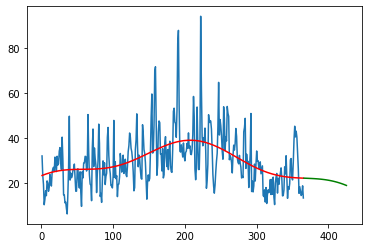

In [ ]:
# Solucao
j = np.linspace(2*np.pi, 4*np.pi, X.size)
model = modelo(j)
print(model[60])

plt.plot(np.arange(1, 366), X)
plt.plot(np.arange(1, 366), modelo(t),color='red')
plt.plot(np.arange(366, 366+60), model[0:60],color='green')

### Questão 2) (5 pontos)
Considere a função $f(x,y)=x^2+16y^2+x$. 

#### 2.1) (1 ponto)
Escreva um código para desenhar as curvas de nível 2, 4, 6 e 8 da função $f(x,y)$ acima.

<a list of 6 text.Text objects>

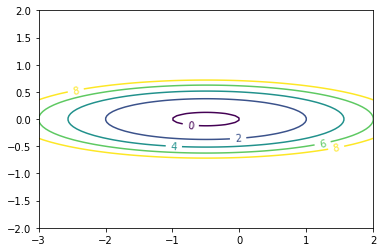

In [ ]:
# Solucao
def f(x, y):
    return x**2 + 16*(y**2) + x

n = 100

X, Y = np.meshgrid(np.linspace(-3, 2, n), np.linspace(-2, 2, n))
Z = f(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X,Y,Z, levels = [0,2,4,6,8])
ax.clabel(CS, inline=1, fontsize=10)

#### 2.2) (2.5 pontos)
Encontre o ponto onde a curva $xy=1$ é tangente a uma das curvas de nível de $f(x,y)$? Utilize como chute inicial o ponto $x_0=[2,1,1]$. O ponto encontrado é:

a) [1.88,0.53] (X) <br>
b) [2.11,0.67] <br>
c) [-2.53,0.5]<br>
d) [-2,-1]

In [ ]:
# Solucao
'''
O sistema de equações fica:

grad_x -> 2x + 1 -λy = 0
grad_y -> 32y - λx = 0
g(x, y) = xy - 1 = 0

    | 2 -λ -y |
J = |-λ 32 -x |
    | y  x  0 |
'''
def jacobi(xyl):
    return (np.array([[2, -xyl[2], -xyl[1]], [-xyl[2], 32, -xyl[0]], [xyl[1], xyl[0], 0]]))
    
n = 100
XYL = np.zeros((3,n))
#condiçoes iniciais, sabendo da existência de outro ponto de tangencia 
#             no terceiro quadrante, podemos encontrá-lo dando um chute mais proximo a ele
XYL[:, 0] = [2,1,1]
#XYL[:,0] = [-2,-1,1]

H = np.zeros(3)
for i in range(1,n):
    h1 = 2*XYL[0,i-1] + 1 - XYL[1,i-1]*XYL[2,i-1]
    h2 = 32*XYL[1,i-1] - XYL[0,i-1]*XYL[2,i-1]
    h3 = XYL[0,i-1]*XYL[1,i-1] - 1
    H[:] = [h1, h2, h3]
    J = jacobi(XYL[:,i-1])
    dxyl = np.linalg.solve(J,-H)
    XYL[:,i] = XYL[:,i-1]+dxyl
        
print(XYL[:,-1])

[1.88579892 0.53027923 8.99827402]


#### 2.3) (1.5 ponto)
Qual é a curva de nível de $f(x,y)$ que é tangente à curva $xy=1$. Faça o gráfico das curvas e do ponto de tangência.

a) 7.38 <br>
b) 8.10 <br> 
c) 9.94 (X)<br> 
d) 10.51

5.943984
9.925775999999999


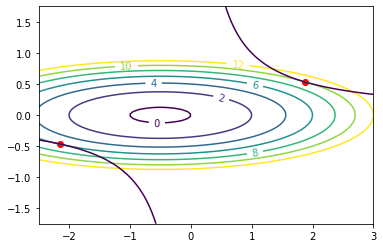

In [ ]:
# Solucao

def f(x, y):
    return x**2 + 16*(y**2) + x

n = 100

xx, yy = np.meshgrid(np.linspace(-2.5, 3, n), np.linspace(-1.75, 1.75, n))
zz = f(xx, yy)

fig, ax = plt.subplots()
CS = ax.contour(xx,yy,zz, levels = [0,2,4,6,8,10,12])
ax.contour(xx, yy, (xx*yy), levels = [1])
ax.clabel(CS, inline=1, fontsize=10)

plt.scatter(-2.14,-0.468,color='red')
plt.scatter(1.88,0.531,color='red')

print(f(-2.14,-0.468))
print(f(1.88,0.531))